In [2]:
import os
import zipfile

file_path="./tmp/rps.zip"
zipref=zipfile.ZipFile(file_path,"r")
zipref.extractall("./tmp/")
zipref.close()



In [21]:
filepath="./tmp/rps-test-set.zip"
zipref=zipfile.ZipFile(file_path,"r")
zipref.extractall("./tmp/")
zipref.close()

In [11]:
rock_dir=os.path.join("./tmp/rps/rock")
paper_dir=os.path.join("./tmp/rps/paper")
scissors_dir=os.path.join("./tmp/rps/scissors")

print("rock:" +str(len(os.listdir(rock_dir))))
print("paper:" +str(len(os.listdir(paper_dir))))
print("scissors:" +str(len(os.listdir(scissors_dir))))

rock:840
paper:840
scissors:840


In [12]:
rock_files=os.listdir(rock_dir)
paper_files=os.listdir(paper_dir)
scissors_files=os.listdir(scissors_dir)
print(rock_files[:5])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png']


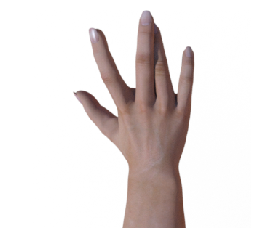

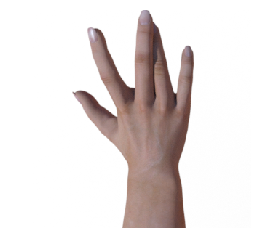

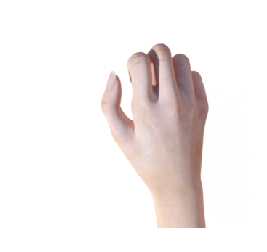

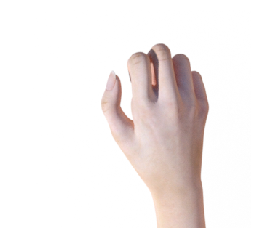

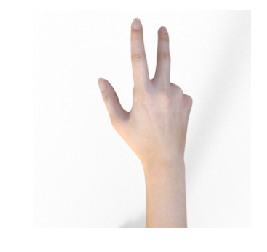

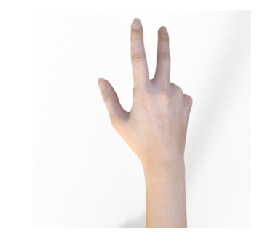

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i,imppath in enumerate(next_paper+next_rock+next_scissors):
    img=mpimg.imread(imppath)
    plt.imshow(img)
    plt.axis("Off")
    plt.show()


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir="./tmp/rps/"
validation_dir="./tmp/rps-test-set/"

training_datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=.2,
height_shift_range=.2,
zoom_range=0.2,
shear_range=0.2,
horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=training_datagen.flow_from_directory(
training_dir,
batch_size=126,
target_size=(150,150),
class_mode="categorical")

validation_generator=validation_datagen.flow_from_directory(
validation_dir,
batch_size=126,
target_size=(150,150),
class_mode="categorical")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [24]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

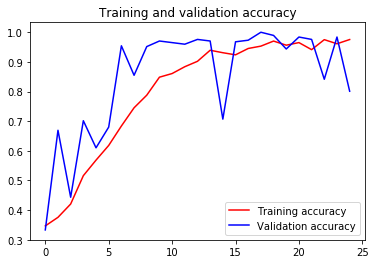

<Figure size 432x288 with 0 Axes>

In [25]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150, 150))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      print(fn)
      print(classes)